In [1]:
%matplotlib inline
import os, sys
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix, hstack


import matplotlib.pyplot as plt

In [2]:
data_path = '/home/ymm/bosch/'

train_num_file   = 'train_numeric.csv'
train_cat_file   = 'train_categorical.csv'
train_date_file  = 'train_date.csv'
test_num_file    = 'test_numeric.csv'
test_cat_file    = 'train_categorical.csv'
test_date_file   = 'train_date.csv'

sample_submission_file   = 'sample_submission.csv'

In [3]:
row_num = 5000
train_date = pd.read_csv(data_path + train_date_file, nrows=row_num, index_col='Id')
train_num = pd.read_csv(data_path + train_num_file, nrows=row_num, index_col='Id')
train_cat = pd.read_csv(data_path + train_cat_file, nrows=row_num, index_col='Id')
train_label = train_num['Response'].values
train_num.drop('Response', axis=1, inplace=True)

/mnt/home/ymm/.virtualenvs/kaggle/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (57,59,60,62,63,65,66,68,69,71,72,74,75,77,78,80,81,83,84,86,87,89,90,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,204,206,210,212,216,218,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,335,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,464,467,470,473,476,479,482,485,488,491,494,497,500,503,506,509,512,515,518,611,614,617,620,623,626,629,632,635,638,641,644,647,650,653,656,659,662,665,668,671,674,677,680,683,686,689,692,695,698,701,704,

In [5]:
train_date.head()

,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
Id,,,,,,,,,,,,,,,,,,,,,
4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## full-scale train labels
train_labels = pd.read_csv(data_path + train_num_file, index_col='Id', usecols=['Id', 'Response'])

In [80]:
train_date_start_columm = pd.read_csv(data_path + train_date_file, index_col='Id', usecols=['Id', 'L0_S0_D1'])
test_date_start_columm = pd.read_csv(data_path + test_date_file, index_col='Id', usecols=['Id', 'L0_S0_D1'])

In [81]:
print train_labels.shape, train_date_start_columm.shape, test_date_start_columm.shape

(1183747, 1) (1183747, 1) (1183747, 1)


In [95]:
print sum(test_date_start_columm.L0_S0_D1.isnull()), sum(train_date_start_columm.L0_S0_D1.isnull())

509885 509885


([array([ 54468.,  94514.,  30160.,  99076.,  31522.,  81201.,  49195.,
          62930.,  98216.,  72580.]),
  array([ 54468.,  94514.,  30160.,  99076.,  31522.,  81201.,  49195.,
          62930.,  98216.,  72580.])],
 array([    0.   ,   171.371,   342.742,   514.113,   685.484,   856.855,
         1028.226,  1199.597,  1370.968,  1542.339,  1713.71 ]),
 <a list of 2 Lists of Patches objects>)

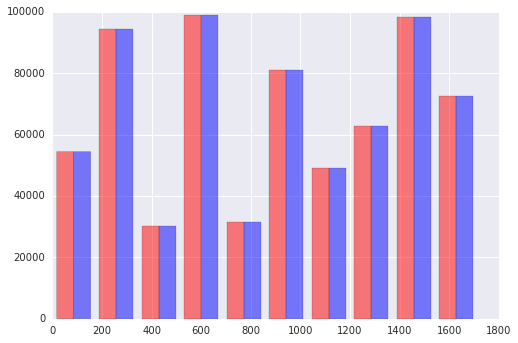

In [83]:
## show the time/date distribution for train/test
start_time_column_name = 'L0_S0_D1'
train_start_time = train_date_start_columm[start_time_column_name].dropna()
test_start_time = test_date_start_columm[start_time_column_name].dropna()
plt.hist([train_start_time, test_start_time], color=['r','b'], alpha=0.5)

In [86]:
labeled_start_time = pd.merge(train_labels, train_date_start_columm, how='left', left_index=True, right_index=True)

In [89]:
missing_df = labeled_start_time[labeled_start_time[start_time_column_name].isnull()]

In [91]:
missing_df.Response.mean()

0.0064151720485991943

In [26]:
tmp1 = labeled_start_time.loc[labeled_start_time.Response==0, 'L0_S0_D1'].dropna()
tmp2 = labeled_start_time.loc[labeled_start_time.Response==1, 'L0_S0_D1'].dropna()

(array([ 16316.,  10051.,   9756.,   7509.,  10676.,  19198.,  14780.,
         31151.,  10135.,  18568.,  18286.,   4678.,      0.,      0.,
          6912.,  17141.,  29266.,  19110.,  19731.,  13218.,  10576.,
             0.,      0.,   4468.,  16188.,   9690.,  31678.,  21925.,
         17314.,      0.,      0.,   7715.,  19274.,  20487.,   1604.,
         17988.,  15573.,   7181.,   6834.,  15147.,  26010.,  23735.,
         20526.,  10148.,  17375.,  15880.,  14715.,  18657.,  16742.,
          6342.]),
 array([    0.    ,    34.2742,    68.5484,   102.8226,   137.0968,
          171.371 ,   205.6452,   239.9194,   274.1936,   308.4678,
          342.742 ,   377.0162,   411.2904,   445.5646,   479.8388,
          514.113 ,   548.3872,   582.6614,   616.9356,   651.2098,
          685.484 ,   719.7582,   754.0324,   788.3066,   822.5808,
          856.855 ,   891.1292,   925.4034,   959.6776,   993.9518,
         1028.226 ,  1062.5002,  1096.7744,  1131.0486,  1165.3228,
        

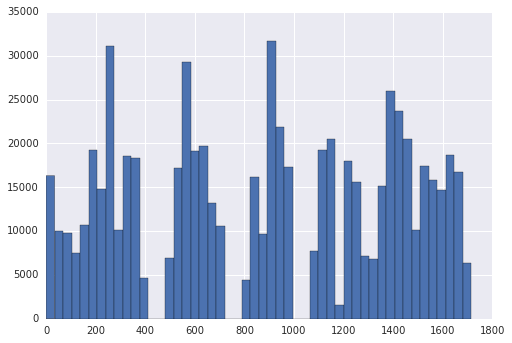

In [28]:
plt.hist(tmp1, bins=50)

(array([  52.,   24.,   33.,   15.,   36.,  177.,  101.,  182.,   64.,
         158.,  218.,   25.,    0.,    0.,   41.,  106.,  149.,  124.,
         127.,  104.,   76.,    0.,    0.,   34.,  180.,  120.,  260.,
         133.,   81.,    0.,    0.,    5.,   53.,   53.,    4.,   55.,
          38.,   43.,   25.,   46.,  147.,   56.,   42.,   71.,   95.,
          43.,   73.,   55.,   65.,   19.]),
 array([  1.46000000e+02,   6.98320000e+03,   1.38204000e+04,
          2.06576000e+04,   2.74948000e+04,   3.43320000e+04,
          4.11692000e+04,   4.80064000e+04,   5.48436000e+04,
          6.16808000e+04,   6.85180000e+04,   7.53552000e+04,
          8.21924000e+04,   8.90296000e+04,   9.58668000e+04,
          1.02704000e+05,   1.09541200e+05,   1.16378400e+05,
          1.23215600e+05,   1.30052800e+05,   1.36890000e+05,
          1.43727200e+05,   1.50564400e+05,   1.57401600e+05,
          1.64238800e+05,   1.71076000e+05,   1.77913200e+05,
          1.84750400e+05,   1.91587600e+05

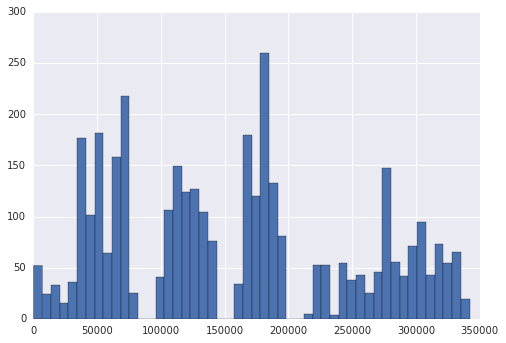

In [29]:
#plt.hist([tmp1, tmp2], color=['r','b'], alpha=0.5)
plt.hist(tmp2, bins=50)

In [45]:
labeled_start_time = labeled_start_time.dropna()

In [62]:
from scipy.stats.mstats import mquantiles

bin_num = 20
start_time_column_name = 'L0_S0_D1'
prob_list = [1.*i/bin_num for i in range(1, bin_num)]
quantile_values = mquantiles(labeled_start_time[start_time_column_name], prob=prob_list)

In [63]:
bins = [labeled_start_time[start_time_column_name].min()]
bins.extend(quantile_values)
bins.append(labeled_start_time[start_time_column_name].max())

In [66]:
labeled_start_time['binning'] = pd.cut(labeled_start_time[start_time_column_name], bins)

In [78]:
labeled_start_time.groupby('binning')['Response'].agg([np.mean, np.size])

,mean,size
binned,,
"(0, 96.27]",0.002998,33693
"(96.27, 195.97]",0.005075,33693
"(195.97, 255.86]",0.006291,33698
"(255.86, 322.41]",0.006856,33695
"(322.41, 392.8]",0.010569,33685
"(392.8, 556.08]",0.005994,33700
"(556.08, 601.79]",0.005044,33706
"(601.79, 670.64]",0.006266,33676
"(670.64, 835.77]",0.008725,33696
